# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing The Dataset

In [2]:
data=pd.read_csv('diabetes.csv')

In [3]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Visualising the data before preprocessing

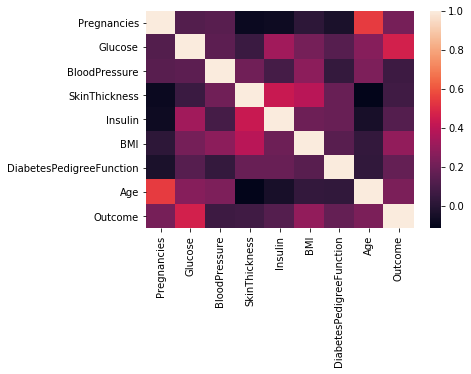

In [6]:
sns.heatmap(data.corr())

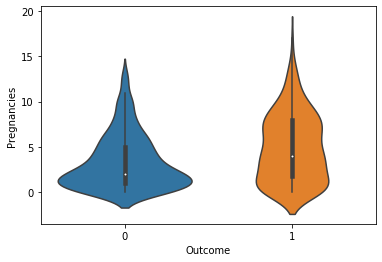

In [7]:
ax = sns.violinplot(x="Outcome", y="Pregnancies", data=data)

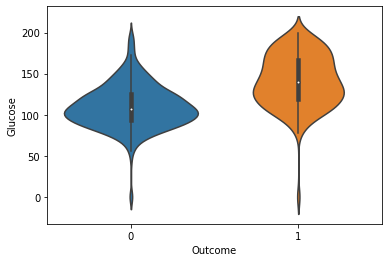

In [8]:
ax= sns.violinplot(x="Outcome", y="Glucose", data=data)

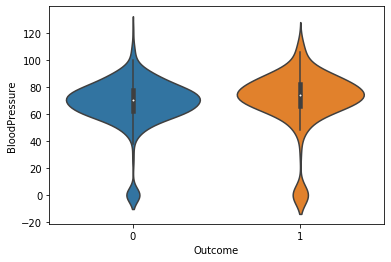

In [9]:
ax = sns.violinplot(x="Outcome", y="BloodPressure", data=data)

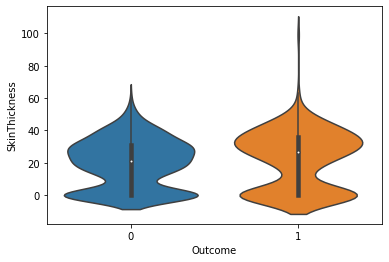

In [10]:
ax = sns.violinplot(x="Outcome", y="SkinThickness", data=data)

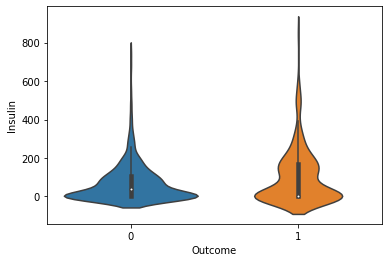

In [11]:
ax = sns.violinplot(x="Outcome", y="Insulin", data=data)

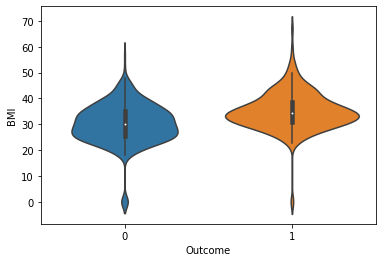

In [12]:
ax = sns.violinplot(x="Outcome", y="BMI", data=data)

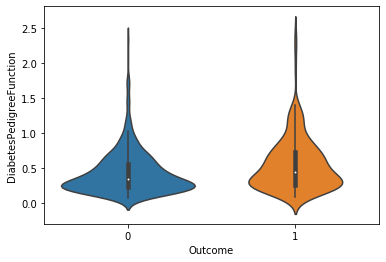

In [13]:
ax = sns.violinplot(x="Outcome", y="DiabetesPedigreeFunction", data=data)

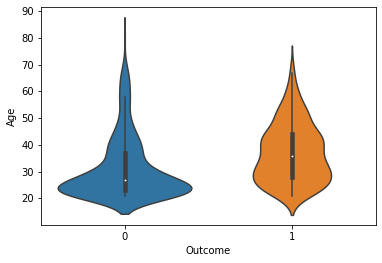

In [14]:
ax = sns.violinplot(x="Outcome", y="Age", data=data)

# Data Preprocessing 

Transforming the numeric attribute(Pregnancies) into a nominal attribute of value 0 and 1, with 1 indicating a patient previously pregnant and 0 indicating a patient was never pregnant

In [15]:
numerical_preg=np.array(data['Pregnancies'])
numerical_preg

array([ 6,  1,  8,  1,  0,  5,  3, 10,  2,  8,  4, 10, 10,  1,  5,  7,  0,
        7,  1,  1,  3,  8,  7,  9, 11, 10,  7,  1, 13,  5,  5,  3,  3,  6,
       10,  4, 11,  9,  2,  4,  3,  7,  7,  9,  7,  0,  1,  2,  7,  7,  1,
        1,  5,  8,  7,  1,  7,  0,  0,  0,  2,  8,  5,  2,  7,  5,  0,  2,
        1,  4,  2,  5, 13,  4,  1,  1,  7,  5,  0,  2,  3,  2,  7,  0,  5,
        2, 13,  2, 15,  1,  1,  4,  7,  4,  2,  6,  2,  1,  6,  1,  1,  1,
        0,  1,  2,  1,  1,  4,  3,  0,  3,  8,  1,  4,  7,  4,  5,  5,  4,
        4,  0,  6,  2,  5,  0,  1,  3,  1,  1,  0,  4,  9,  3,  8,  2,  2,
        0,  0,  0,  5,  3,  5,  2, 10,  4,  0,  9,  2,  5,  2,  1,  4,  9,
        1,  8,  7,  2,  1,  2, 17,  4,  7,  0,  2,  0,  6,  3,  4,  4,  3,
        6,  6,  2,  1,  2,  8,  6,  0,  5,  5,  6,  0,  1,  5,  4,  7,  8,
        1,  8,  5,  3,  9,  7, 11,  8,  5,  1,  3,  4,  4,  0,  1,  0,  2,
        6,  5,  8,  5,  1,  7,  2,  0,  7,  0,  9, 12,  5,  6,  5,  5,  0,
        2,  7,  7,  1,  1

In [16]:
nominal_preg=[]
for i in numerical_preg:
    if i>0:
        nominal_preg.append(1)
    else:
        nominal_preg.append(0)

In [17]:
nominal_preg

[1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,


In [18]:
data['Pregnancies']=pd.Series(nominal_preg)

In [19]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,1,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,1,101,76,48,180,32.9,0.171,63,0
764,1,122,70,27,0,36.8,0.340,27,0
765,1,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Handling missing values in Glucose,BloodPressure,SkinThickness,Insulin,BMI by replacing 0 with mean value of that attribute

In [20]:
data['Glucose'].replace(0,data['Glucose'].mean(),inplace=True)
data['BloodPressure'].replace(0,data['BloodPressure'].mean(),inplace=True)
data['SkinThickness'].replace(0,data['SkinThickness'].mean(),inplace=True)
data['Insulin'].replace(0,data['Insulin'].mean(),inplace=True)
data['BMI'].replace(0,data['BMI'].mean(),inplace=True)

In [21]:
pd.set_option('display.max_rows', 1000)
data.head(768)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,148.000000,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,85.000000,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,1,183.000000,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,1,89.000000,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,0,137.000000,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,1,116.000000,74.000000,20.536458,79.799479,25.600000,0.201,30,0
6,1,78.000000,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,1,115.000000,69.105469,20.536458,79.799479,35.300000,0.134,29,0
8,1,197.000000,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,1,125.000000,96.000000,20.536458,79.799479,31.992578,0.232,54,1


In [22]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.855469,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,0.351857,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,1.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,1.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,1.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Visualising the data after preprocessing

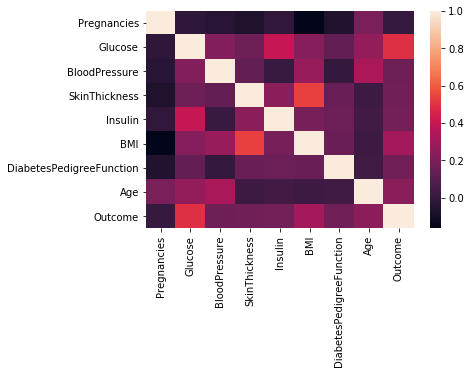

In [23]:
sns.heatmap(data.corr())

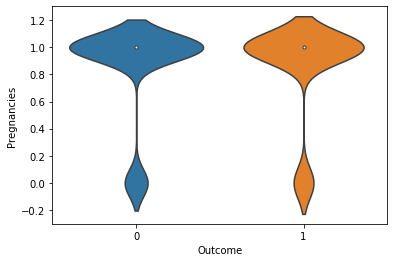

In [24]:
ax = sns.violinplot(x="Outcome", y="Pregnancies", data=data)

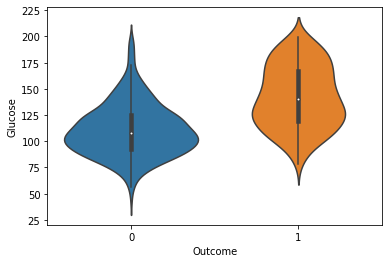

In [25]:
ax= sns.violinplot(x="Outcome", y="Glucose", data=data)

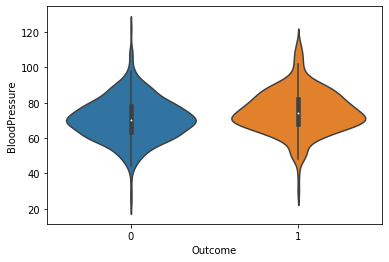

In [26]:
ax= sns.violinplot(x="Outcome", y="BloodPressure", data=data)

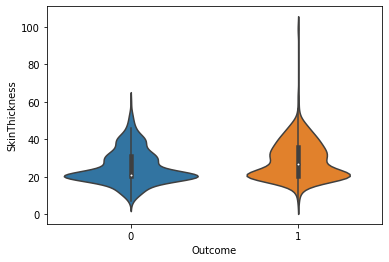

In [27]:
ax= sns.violinplot(x="Outcome", y="SkinThickness", data=data)

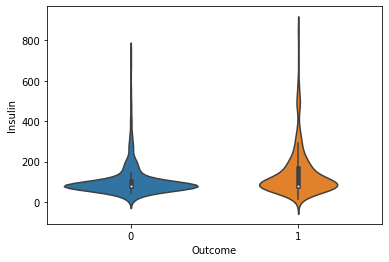

In [28]:
ax = sns.violinplot(x="Outcome", y="Insulin", data=data)

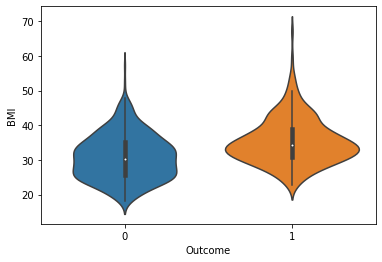

In [29]:
ax = sns.violinplot(x="Outcome", y="BMI", data=data)

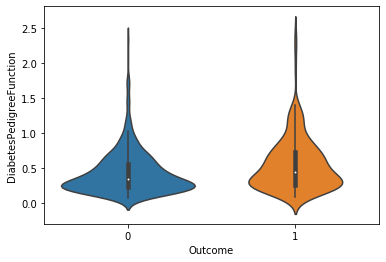

In [30]:
ax = sns.violinplot(x="Outcome", y="DiabetesPedigreeFunction", data=data)

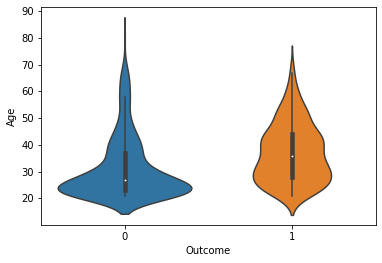

In [31]:
ax = sns.violinplot(x="Outcome", y="Age", data=data)

# Standardizing Data

In [32]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
columns=X.columns

In [33]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X)

In [34]:
X

array([[ 0.411035  ,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [ 0.411035  , -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 0.411035  ,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.411035  , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [ 0.411035  ,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [ 0.411035  , -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [35]:
X_dataframe=pd.DataFrame(data=X,columns=columns)

In [36]:
X_dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.411035,0.865276,-0.021044,0.872057,-0.417768,0.167255,0.468492,1.425995
1,0.411035,-1.205989,-0.516583,0.248678,-0.417768,-0.851535,-0.365061,-0.190672
2,0.411035,2.015979,-0.681762,-0.630654,-0.417768,-1.331821,0.604397,-0.105584
3,0.411035,-1.074480,-0.516583,-0.374700,-0.265107,-0.633222,-0.920763,-1.041549
4,-2.432883,0.503626,-2.663916,0.872057,0.530423,1.549899,5.484909,-0.020496
5,0.411035,-0.186795,0.144135,-0.630654,-0.417768,-0.997076,-0.818079,-0.275760
6,0.411035,-1.436130,-1.838019,0.560368,-0.329609,-0.211152,-0.676133,-0.616111
7,0.411035,-0.219673,-0.260103,-0.630654,-0.417768,0.414676,-1.020427,-0.360847
8,0.411035,2.476260,-0.186224,1.911021,4.561826,-0.283923,-0.947944,1.681259
9,0.411035,0.109100,1.961109,-0.630654,-0.417768,-0.066691,-0.724455,1.766346


# Logistic Regression Result Without PCA, K-Means Clustering

In [37]:
from sklearn.linear_model import LogisticRegression
lgm=LogisticRegression()

In [38]:
lgm.fit(X_dataframe,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_pred=lgm.predict(X_dataframe)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.7786458333333334

# Applying PCA

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4','principal component 5'])

In [42]:
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,1.082766,-0.971338,0.040736,-0.450022,0.586382
1,-1.327268,0.156926,-0.109587,-0.806949,0.022146
2,-0.353586,-0.782861,1.572523,0.857754,0.301667
3,-1.709628,0.470737,-0.087852,-0.538118,-0.678659
4,2.250667,3.623593,2.374730,0.928240,4.235485
5,-1.263151,-0.621305,-0.107368,0.118210,-0.487994
6,-1.540855,1.154190,0.231797,-1.460543,-0.460287
7,-0.782306,-0.097030,-0.409417,-0.304380,-0.765084
8,3.548781,-1.190287,2.950939,0.061458,-2.812592
9,0.393183,-2.409925,-1.350035,0.423794,0.013683


In [43]:
X_afterpca=principalDf
X_afterpca

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,1.082766,-0.971338,0.040736,-0.450022,0.586382
1,-1.327268,0.156926,-0.109587,-0.806949,0.022146
2,-0.353586,-0.782861,1.572523,0.857754,0.301667
3,-1.709628,0.470737,-0.087852,-0.538118,-0.678659
4,2.250667,3.623593,2.374730,0.928240,4.235485
5,-1.263151,-0.621305,-0.107368,0.118210,-0.487994
6,-1.540855,1.154190,0.231797,-1.460543,-0.460287
7,-0.782306,-0.097030,-0.409417,-0.304380,-0.765084
8,3.548781,-1.190287,2.950939,0.061458,-2.812592
9,0.393183,-2.409925,-1.350035,0.423794,0.013683


# Logistic Regression Result After Applying PCA

In [44]:
from sklearn.linear_model import LogisticRegression
lgm=LogisticRegression()

In [45]:
lgm.fit(X_afterpca,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_pred=lgm.predict(X_afterpca)
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.7265625

# Applying K-Means Clustering

In [47]:
from sklearn.cluster import KMeans

In [48]:
kmeans = KMeans(n_clusters=2)

In [49]:
kmeans.fit(X_afterpca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [50]:
kmeans.cluster_centers_

array([[-0.89721668,  0.23354986,  0.01474673,  0.02815844,  0.02596557],
       [ 1.39965802, -0.36433778, -0.0230049 , -0.04392716, -0.04050629]])

In [51]:
kmeans_label=np.array(kmeans.labels_)
kmeans_label

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,

In [52]:
y_array=np.array(y)

In [53]:
y_array

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [54]:
data_afterpca= pd.concat([X_afterpca, data[['Outcome']]], axis = 1)
data_afterkmeans=pd.DataFrame(columns=['principal component 1','principal component 2','principal component 3','principal component 4','principal component 5','Outcome'])

In [55]:
i=0
j=0
count=0
while i<768:
    if y_array[i]==kmeans_label[i]:
        count=count+1
        data_afterkmeans.loc[j]=data_afterpca.loc[i]
        j=j+1
    i=i+1    

In [56]:
count

545

In [57]:
data_afterkmeans['Outcome']=data_afterkmeans['Outcome'].astype(int)

In [58]:
data_afterkmeans

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,Outcome
0,1.082766,-0.971338,0.040736,-0.450022,0.586382,1
1,-1.327268,0.156926,-0.109587,-0.806949,0.022146,0
2,-1.709628,0.470737,-0.087852,-0.538118,-0.678659,0
3,2.250667,3.623593,2.374730,0.928240,4.235485,1
4,-1.263151,-0.621305,-0.107368,0.118210,-0.487994,0
5,-0.782306,-0.097030,-0.409417,-0.304380,-0.765084,0
6,3.548781,-1.190287,2.950939,0.061458,-2.812592,1
7,0.393183,-2.409925,-1.350035,0.423794,0.013683,1
8,-0.009303,-0.671179,-1.488761,-0.055378,-0.447560,0
9,0.694144,-0.607964,0.180154,0.350831,0.041014,1


In [59]:
data_afterkmeans.to_csv('finaldataframe.csv')

In [60]:
x_afterkmeans=data_afterkmeans.iloc[:,:-1]
y_afterkmeans=data_afterkmeans.iloc[:,-1]

# Logistic Regression Results After PCA and K-means Clustering

In [61]:
from sklearn.linear_model import LogisticRegression
lgm1=LogisticRegression()
lgm1.fit(x_afterkmeans,y_afterkmeans)
y_pred=lgm1.predict(x_afterkmeans)
from sklearn.metrics import accuracy_score
accuracy_score(y_afterkmeans,y_pred)

0.9944954128440368

In [62]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_afterkmeans,y_pred)

array([[372,   0],
       [  3, 170]], dtype=int64)

In [63]:
print(classification_report(y_afterkmeans,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       372
           1       1.00      0.98      0.99       173

    accuracy                           0.99       545
   macro avg       1.00      0.99      0.99       545
weighted avg       0.99      0.99      0.99       545



# Applying K-Means Clustering on the initial dataset(without pca processed dataset)

In [64]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

In [65]:
kmeans.fit(X_dataframe)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [66]:
kmeans.cluster_centers_

array([[ 0.04551578,  0.70086789,  0.52905462,  0.51158985,  0.42815393,
         0.6146403 ,  0.2115168 ,  0.50523389],
       [-0.03233749, -0.497944  , -0.37587622, -0.36346806, -0.30418954,
        -0.43668208, -0.15027586, -0.35895236]])

In [67]:
kmeans_label=np.array(kmeans.labels_)
kmeans_label

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,

In [68]:
y_array=np.array(y)

In [69]:
col=data.columns
data_afteronlykmeans=pd.DataFrame(columns=col)

In [70]:
i=0
j=0
count=0
while i<768:
    if y_array[i]==kmeans_label[i]:
        count=count+1
        data_afteronlykmeans.loc[j]=X_dataframe.loc[i]
        j=j+1
    i=i+1 

In [71]:
count

221

# SVM Results Before PCA and K-means Clustering

In [72]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_dataframe,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
predictions = svc_model.predict(X_dataframe)

In [74]:
print(classification_report(y,predictions))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       500
           1       0.82      0.62      0.70       268

    accuracy                           0.82       768
   macro avg       0.82      0.77      0.79       768
weighted avg       0.82      0.82      0.81       768



# SVM Results After PCA and K-means Clustering

In [75]:
svc_model.fit(x_afterkmeans,y_afterkmeans)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [76]:
predictions = svc_model.predict(x_afterkmeans)

In [77]:
accuracy_score(y_afterkmeans,predictions)

0.9963302752293578

In [78]:
confusion_matrix(y_afterkmeans,predictions)

array([[372,   0],
       [  2, 171]], dtype=int64)

In [79]:
print(classification_report(y_afterkmeans,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       372
           1       1.00      0.99      0.99       173

    accuracy                           1.00       545
   macro avg       1.00      0.99      1.00       545
weighted avg       1.00      1.00      1.00       545



# KNN Results Before PCA and K-means Clustering

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_dataframe,y)
pred = knn.predict(X_dataframe)

print(confusion_matrix(y,pred))
print('\n')
print(classification_report(y,pred))

[[451  49]
 [ 67 201]]


              precision    recall  f1-score   support

           0       0.87      0.90      0.89       500
           1       0.80      0.75      0.78       268

    accuracy                           0.85       768
   macro avg       0.84      0.83      0.83       768
weighted avg       0.85      0.85      0.85       768



# KNN Results After PCA and K-means Clustering

In [82]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_afterkmeans,y_afterkmeans)
pred = knn.predict(x_afterkmeans)

print(confusion_matrix(y_afterkmeans,pred))
print('\n')
print(classification_report(y_afterkmeans,pred))

[[370   2]
 [  7 166]]


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       372
           1       0.99      0.96      0.97       173

    accuracy                           0.98       545
   macro avg       0.98      0.98      0.98       545
weighted avg       0.98      0.98      0.98       545



# Naive Bayes Results Before PCA and K-means Clustering

In [83]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_dataframe, y)
y_pred = classifier.predict(X_dataframe)

In [84]:
print(confusion_matrix(y,y_pred))
print('\n')
print(classification_report(y,y_pred))

[[425  75]
 [117 151]]


              precision    recall  f1-score   support

           0       0.78      0.85      0.82       500
           1       0.67      0.56      0.61       268

    accuracy                           0.75       768
   macro avg       0.73      0.71      0.71       768
weighted avg       0.74      0.75      0.74       768



# Naive Bayes Results After PCA and K-means Clustering

In [85]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_afterkmeans, y_afterkmeans)
y_pred = classifier.predict(x_afterkmeans)

In [86]:
print(confusion_matrix(y_afterkmeans,y_pred))
print('\n')
print(classification_report(y_afterkmeans,y_pred))

[[357  15]
 [ 22 151]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       372
           1       0.91      0.87      0.89       173

    accuracy                           0.93       545
   macro avg       0.93      0.92      0.92       545
weighted avg       0.93      0.93      0.93       545



   # Accuracy Score of various algorithms on Original Dataset

In [87]:
accuracy_df_before=pd.DataFrame() 

In [88]:
accuracy_df_before['Algorithm']=['Logistic Regression','SVM','KNN','Naive Bayes']

In [89]:
accuracy_df_before['Accuracy_Score']=[0.77,0.82,0.85,0.75]

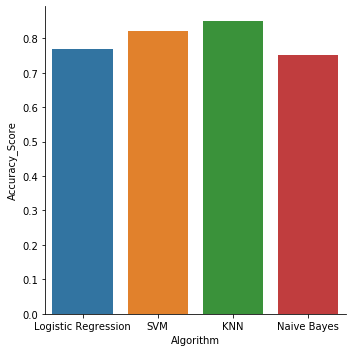

In [90]:
sns.catplot(x='Algorithm',y='Accuracy_Score',data=accuracy_df_before,kind='bar')

# Accuracy of various algorithms on PCA + KMEANS processed dataset

In [91]:
accuracy_df_after=pd.DataFrame() 

In [92]:
accuracy_df_after['Algorithm']=['Logistic Regression','SVM','KNN','Naive Bayes']

In [93]:
accuracy_df_after['Accuracy_Score']=[0.99,0.99,0.98,0.93]

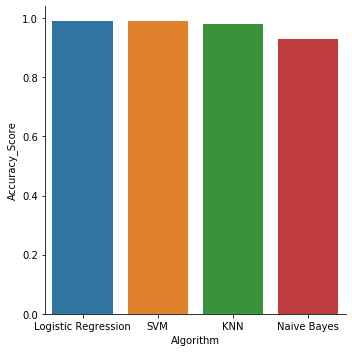

In [94]:
sns.catplot(x='Algorithm',y='Accuracy_Score',data=accuracy_df_after,kind='bar')